In [1]:
import pandas as pd

In [2]:
true_bps = set(pd.read_table("./human_cu_bps_info.tsv")['uniprot'])
pred_bps = set(pd.read_table("./human_pred_cu_bps.tsv")['seq_id'])
intersection = true_bps & pred_bps

In [3]:
len(true_bps)
len(pred_bps)
len(intersection)

53

28

14

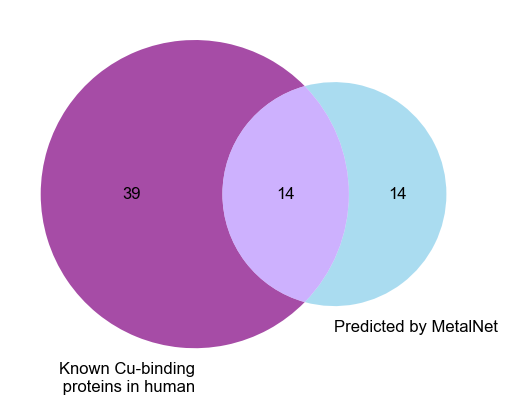

In [4]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "Arial"

v = venn2(subsets=(
    len(true_bps) - len(intersection), 
    len(pred_bps) - len(intersection), 
    len(intersection)
), 
    set_labels=('Known Cu-binding\n proteins in human', 'Predicted by MetalNet'),
    set_colors=('purple', 'skyblue'),
    alpha=0.7)
for text in v.set_labels:
    text.set_fontsize(12)
for text in v.subset_labels:
    text.set_visible(True)
    text.set_fontsize(12)
plt.savefig("./fig/venn_human_cu_anno_pred.pdf", bbox_inches="tight")

In [5]:
pred_uniq = pred_bps - intersection
print(pred_uniq)

{'P14679', 'P55789', 'Q9BXU8', 'Q99807', 'Q96S96', 'P09172', 'P02794', 'P0C7X4', 'P02792', 'Q8N4E7', 'P09105', 'P69905', 'P02100', 'P02144'}


In [6]:
true_uniq = true_bps - intersection

In [7]:
df_human_all = pd.read_table("../human_pred_mbps_with_type.tsv")
df_true_uniq = df_human_all[df_human_all['seq_id'].map(lambda x: x in true_uniq)]

In [8]:
len(set(df_true_uniq['seq_id']))
set(df_true_uniq['pred'])

19

{'CA', 'FE', 'FE;ZN', 'MG', 'ZN'}